## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0726 10:24:20.141891  8196 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 10:24:39.739475  8196 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 10:24:43.973153  8196 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0726 10:24:45.734442  8196 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 10:24:45.810239  8196 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0726 10:24:48.428236  8196 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0726 10:24:48.584817  8196 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 79s 2ms/step - loss: 1.9401 - acc: 0.2981 - val_loss: 1.7864 - val_acc: 0.3638
Epoch 2/100
50000/50000 [==============================] - 17s 334us/step - loss: 1.7063 - acc: 0.3898 - val_loss: 1.6210 - val_acc: 0.4202
Epoch 3/100
50000/50000 [==============================] - 16s 319us/step - loss: 1.6173 - acc: 0.4213 - val_loss: 1.6006 - val_acc: 0.4231
Epoch 4/100
50000/50000 [==============================] - 16s 326us/step - loss: 1.5490 - acc: 0.4461 - val_loss: 1.5791 - val_acc: 0.4354
Epoch 5/100
50000/50000 [==============================] - 16s 328us/step - loss: 1.4984 - acc: 0.4655 - val_loss: 1.5419 - val_acc: 0.4492
Epoch 6/100
50000/50000 [==============================] - 17s 343us/step - loss: 1.4653 - acc: 0.4771 - val_loss: 1.5313 - val_acc: 0.4544
Epoch 7/100
50000/50000 [==============================] - 17s 340us/step - loss: 1.4363 - acc: 0.4881 - val_los

50000/50000 [==============================] - 18s 370us/step - loss: 0.5590 - acc: 0.7987 - val_loss: 2.0492 - val_acc: 0.4967
Epoch 59/100
50000/50000 [==============================] - 18s 355us/step - loss: 0.5429 - acc: 0.8073 - val_loss: 2.0851 - val_acc: 0.5061
Epoch 60/100
50000/50000 [==============================] - 17s 336us/step - loss: 0.5400 - acc: 0.8096 - val_loss: 2.0263 - val_acc: 0.5068
Epoch 61/100
50000/50000 [==============================] - 19s 388us/step - loss: 0.5308 - acc: 0.8116 - val_loss: 2.1302 - val_acc: 0.4907
Epoch 62/100
50000/50000 [==============================] - 19s 373us/step - loss: 0.5174 - acc: 0.8150 - val_loss: 2.1415 - val_acc: 0.4991
Epoch 63/100
50000/50000 [==============================] - 20s 396us/step - loss: 0.5099 - acc: 0.8166 - val_loss: 2.2220 - val_acc: 0.4989
Epoch 64/100
50000/50000 [==============================] - 19s 371us/step - loss: 0.5030 - acc: 0.8218 - val_loss: 2.1733 - val_acc: 0.5073
Epoch 65/100
50000/50000 [

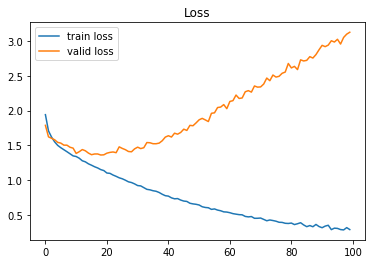

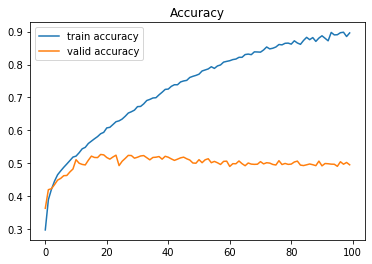

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()